# A1.1

<div class="alert alert-block alert-info">
Using Python, plot the number of births recorded in each state/territory for different Australian states over different years.

## a

<div class="alert alert-block alert-info">
Describe the trend in number of births for Queensland and Tasmania for the period 1977 to 2016?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

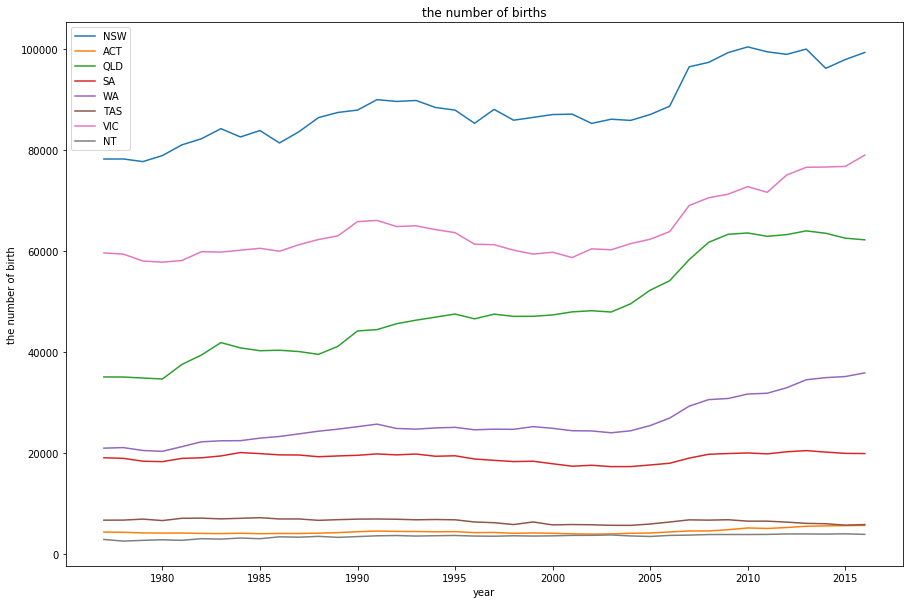

In [2]:
birth_df = pd.read_csv('births.csv', index_col=0) #read csv file
plt.figure(figsize = (15, 10))
plt.plot(birth_df)
plt.legend(birth_df.columns.values)
plt.title('the number of births')
plt.xlabel('year')
plt.ylabel('the number of birth')
plt.show()

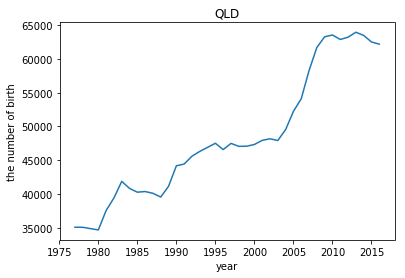

In [3]:
plt.plot(birth_df['QLD'])
plt.title('QLD')
plt.xlabel('year')
plt.ylabel('the number of birth')
plt.show()

The trend has generally increased

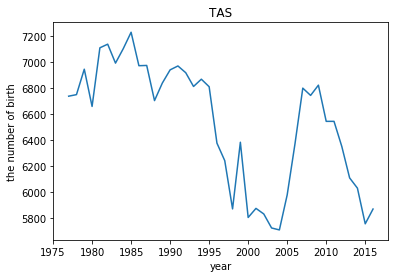

In [4]:
plt.plot(birth_df['TAS'])
plt.title('TAS')
plt.xlabel('year')
plt.ylabel('the number of birth')
plt.show()

The trend generally fluctuating decrease. During 1975-1985, the number of birth has increased, after 1985 the number of birth decrease. Between 1997 and 2000, there was a sharp fluctuation in the number of births. After 2005, the number of birth has increased to approximate 6800, After that, the number of births has dropped sharply.

## b

<div class="alert alert-block alert-info">
Draw a bar chart to show the number of births in each Australian state in 2016.

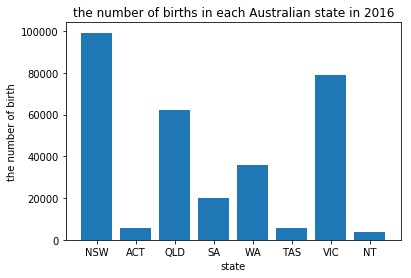

In [5]:
plt.bar(birth_df.columns.values, birth_df.loc[2016])
plt.xlabel('state')
plt.ylabel('the number of birth')
plt.title('the number of births in each Australian state in 2016')
plt.show()

# A1.2

<div class="alert alert-block alert-info">
We will now investigate the trend in the total number of births over different years. For this, you will need to aggregate the total number of births registered in Australia by year. 

In [6]:
total_birth = pd.DataFrame(birth_df.apply(lambda x: x.sum(), axis = 1))
total_birth.rename(columns = {0: 'total_birth'}, inplace = True)
total_birth

,total_birth
Year,
1977,226954
1978,226359
1979,223370
1980,223664
1981,230920
1982,237076
1983,241764
1984,240544
1985,241814


## a

<div class="alert alert-block alert-info">
Fit a linear regression using Python to the above aggregated data (i.e., total number of births registered in Australia over time) and plot the linear fit.

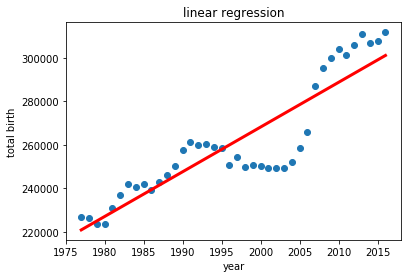

In [7]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(total_birth.index.values, total_birth.loc[:,'total_birth'])
line = [slope*xi + intercept for xi in total_birth.index]
plt.scatter(total_birth.index, total_birth.loc[:,'total_birth'])
plt.plot(total_birth.index, line, 'r-', linewidth=3)
plt.xlabel('year')
plt.ylabel('total birth')
plt.title('linear regression')
plt.show() 

## b

<div class="alert alert-block alert-info">
Does it look like a good fit to you? Identify the period time having any unusual trend(s) in your plot.

No. During 1983 to 2015, the total birth fluctuated increase. but the liner regression is Straight up.

## c

<div class="alert alert-block alert-info">
Use the linear fit to predict the total births in Australia for the years 2050 and 2100. 

In [8]:
total_birth_2050 = slope * 2050 + intercept
print('the total births in Australia for the years 2050 is:' + str(total_birth_2050))
total_birth_2100 = slope * 2100 + intercept
print('the total births in Australia for the years 2100 is:' + str(total_birth_2100))

the total births in Australia for the years 2050 is:370945.74399624765
the total births in Australia for the years 2100 is:473754.2430581609


## d

<div class="alert alert-block alert-info">
Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 2010 onwards). How is the fit? Which model would give better predictions of future population of Australia do you think and why?

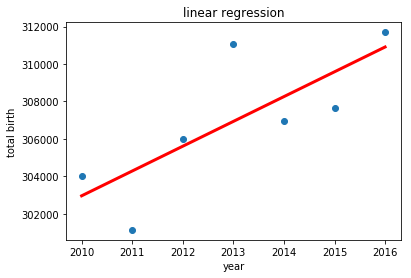

In [9]:
total_part = total_birth.loc['2010':]
slope, intercept, r_value, p_value, std_err = linregress(total_part.index.values, total_part['total_birth'])
line = [slope*xi + intercept for xi in total_part.index.values]
plt.scatter(total_part.index.values, total_part['total_birth'])
plt.plot(total_part.index.values, line, 'r-', linewidth=3)
plt.xlabel('year')
plt.ylabel('total birth')
plt.title('linear regression')
plt.show()

This is better than the last model. I will chose this model to predict the future population of Australia, because this linear regression is more relevant to these point.

## e: challenge

<div class="alert alert-block alert-info">
Can you think of a better model than linear regression to fit to all of the data to capture the trend in the number of births.

In [10]:
total_birth.reset_index(drop=False, inplace=True)

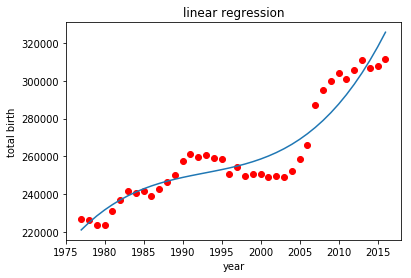

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(total_birth.loc[:,'Year'].values.reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, total_birth.loc[:,'total_birth'])
plt.scatter(total_birth.loc[:, 'Year'], total_birth.loc[:,'total_birth'], color='red')
plt.plot(total_birth.loc[:, 'Year'], pol_reg.predict(poly_reg.fit_transform(total_birth.loc[:,'Year'].values.reshape(-1,1))))
plt.xlabel('year')
plt.ylabel('total birth')
plt.title('linear regression')
plt.show()

In [12]:
print('the total births of Australia at 2050 is:'+str(pol_reg.predict(poly_reg.fit_transform([[2050]]))[0]))
print('the total births of Australia at 2100 is:'+str(pol_reg.predict(poly_reg.fit_transform([[2100]]))[0]))

the total births of Australia at 2050 is:1148774.1656742096
the total births of Australia at 2100 is:6049884.466032028


## reference

Machine Learning: Polynomial Regression with Python. Nhan Tan. Retrieved from https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

# A1.3

<div class="alert alert-block alert-info">
Inspect the data on Total Fertility Rate (TFR.csv) for Queensland and Northern Territory. 

## a

<div class="alert alert-block alert-info">
What was the minimum value for TFR recorded in the dataset for Queensland and when did that occur? What was the corresponding TFR value for Northern Territory in the same year? 

In [13]:
TFR_df = pd.read_csv('TFR.csv')
QLD_min = min(TFR_df['QLD'])
index_1 = TFR_df[TFR_df['QLD']==QLD_min].index.values[0]
print('the minimum values for TFR recorded in the dataset for Queensland is:' + str(QLD_min))
print('the year when it occured is:' + str(TFR_df.iloc[index_1,0]))
print('the TFR in the same year is:' + str(TFR_df.loc[index_1, 'NT']))

the minimum values for TFR recorded in the dataset for Queensland is:1.8
the year when it occured is:1999
the TFR in the same year is:2.123


# A1.4

<div class="alert alert-block alert-info">
Next, plot the natural growth in Australia's population over different years. For this, you will need to aggregate the total births and deaths by year. (HINT: Natural growth in a population is the difference between the total numbers of births and deaths in a population, for instance, Natural Growth of Australia’s Population = Total Births in Australia - Total Deaths in Australia) 

In [14]:
total_birth = total_birth.set_index('Year')

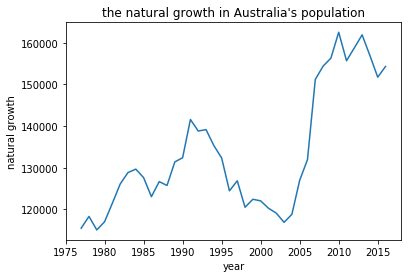

In [15]:
death_df = pd.read_csv('Deaths.csv', index_col = 0)
total_death = pd.DataFrame(death_df.apply(lambda x: x.sum(), axis = 1))
total_death.rename(columns = {0: 'total_death'}, inplace = True)
N_A = pd.merge(total_death, total_birth, left_index = True, right_index = True)
N_A['nature growth'] = N_A.apply(lambda x: x[1] - x[0], axis = 1)
plt.plot(N_A.index.values, N_A['nature growth'])
plt.xlabel('year')
plt.ylabel('natural growth')
plt.title('the natural growth in Australia\'s population')
plt.show()

## a

<div class="alert alert-block alert-info">
Describe the trend in natural growth in Australian population over time using linear regression? 

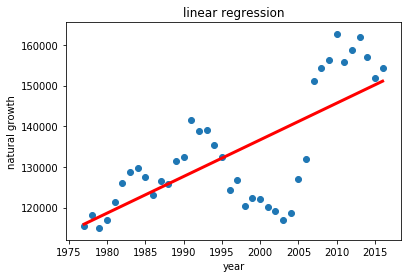

In [16]:
slope, intercept, r_value, p_value, std_err = linregress(N_A.index.values, N_A.loc[:, 'nature growth'])
line = [slope*xi + intercept for xi in N_A.index.values]
plt.plot(N_A.index.values, line, 'r-', linewidth = 3)
plt.scatter(N_A.index.values, N_A['nature growth'])
plt.xlabel('year')
plt.ylabel('natural growth')
plt.title('linear regression')
plt.show()

# A2.1

<div class="alert alert-block alert-info">
Let’s look at the Net Overseas Migration (NOM) data in different states over time.

## a 

<div class="alert alert-block alert-info">
Use Python to plot the NOM to Victoria, Tasmania and Western Australia over time. Explain and compare the trend in all three states (VIC, TAS and WA). 

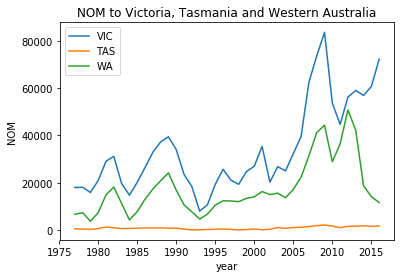

In [17]:
NOM_df = pd.read_csv('NOM.csv', index_col = 0)
plt.plot(NOM_df['VIC'], label = 'VIC')
plt.plot(NOM_df['TAS'], label = 'TAS')
plt.plot(NOM_df['WA'], label = 'WA')
plt.legend()
plt.xlabel('year')
plt.ylabel('NOM')
plt.title('NOM to Victoria, Tasmania and Western Australia')
plt.show()

TAS: The trend of TAS is flat and its value has been fluctuating around 0
WA has the same trend as the VIC between 1975 to 2012. WA and VIC both have two fluctuations from 1975 to 1993. During 1975 to 1994, VIC decreased fluctuated, WA has two growths and two declines, and the value in 1994 is about the same as the value in 1975. After 1993, WA and VIC both increased, but the VIC has a sharply increase after 2005. VIC and WA both decreased from 2007 to 2010, after that they both increased until 2012. After 2012, VIC increased, WA decreased.

## b

<div class="alert alert-block alert-info">
 Plot the Net Overseas Migration (NOM) to Australia over time. Do you find the trend strange? Explain the reason to your answer (Hint: You might go online to find contributing factors to this trend). 

Text(0.5, 1.0, 'NOM to Australia')

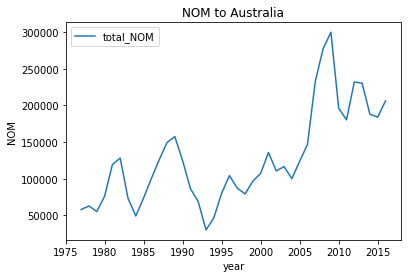

In [18]:
total_NOM = pd.DataFrame(NOM_df.apply(lambda x: x.sum(), axis = 1))
total_NOM.rename(columns = {0: 'total_NOM'}, inplace = True)
total_NOM.plot()
plt.xlabel('year')
plt.ylabel('NOM')
plt.title('NOM to Australia')

In 2005, the Australian government implemented some immigration policies, resulting in a substantial increase in NOM.

# A2.2

<div class="alert alert-block alert-info">
Now let's look at the relationship between Net Overseas Migration (NOM) and Net Interstate Migration (NIM). 

## a

<div class="alert alert-block alert-info">
Use Python to combine the data from the different files into a single table. The resulting table should contain the NOM and NIM values for each of the states for a given year. What are the first year and last year for the combined data? 

In [19]:
NIM_df = pd.read_csv('NIM.csv', index_col = 0)
multi_colum = pd.MultiIndex.from_product([['NOM','NIM'], ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']])
NOM_NIM = pd.merge(NOM_df, NIM_df, left_index = True, right_index = True)
NOM_NIM.columns = multi_colum
print('The first year is:'  + str(NOM_NIM.index[0]))
print('The last year is:' + str(NOM_NIM.index[-1]))

The first year is:1977
The last year is:2016


## b

<div class="alert alert-block alert-info">
Now that you have the data combined, we can see whether there is a relationship between NOM and NIM. Plot the values against each other using scatter plot. Can you see any relationship between NOM and NIM? 

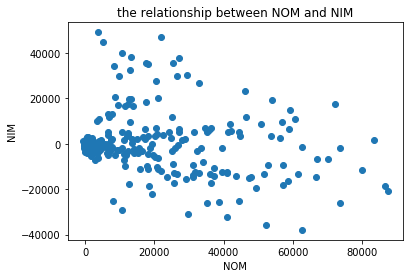

In [20]:
plt.scatter(NOM_NIM.loc[:,'NOM'],NOM_NIM.loc[:,'NIM'])
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.title('the relationship between NOM and NIM')
plt.show()

No, I can not see any relationship

## c

<div class="alert alert-block alert-info">
Try selecting and plotting the data for Victoria only using scatter plot. Can you see a relationship now? If so, explain the relationship.

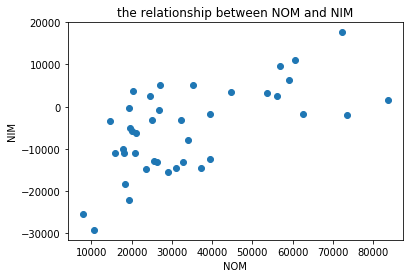

In [21]:
plt.scatter(NOM_NIM.loc[:,('NOM','VIC')], NOM_NIM.loc[:,('NIM','VIC')])
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.title('the relationship between NOM and NIM')
plt.show()

NOM and NIM is Linear relationship

## d

<div class="alert alert-block alert-info">
Finally, plot the Net Interstate Migration (NIM) for Queensland and New South Wales over different years. Note graphs for both QLD and NSW should be on the same plot. Compare the plots for these two states. What can you infer from the trend you see for these two states?


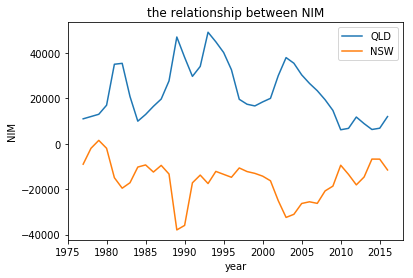

In [22]:
plt.plot(NIM_df.index.values, NIM_df['QLD'], label = 'QLD')
plt.plot(NIM_df.index.values, NIM_df['NSW'], label = 'NSW')
plt.legend()
plt.ylabel('NIM')
plt.xlabel('year')
plt.title('the relationship between NIM')
plt.show()

When the QLD increases, the NSW decreases, and when the NSW increases, the QLD decreases.

# A3.

<div class="alert alert-block alert-info">
Now let's look at the relationship between other variables impacting the population size and growth of Australian states/territories over time. Ensure that you have combined all the data from the different files (Births.csv, Deaths.csv, TFR.csv, NOM.csv and NIM.csv) into a single table. 

In [23]:
#crete the multicolumn
multi_colum = pd.MultiIndex.from_product([['Births','Deaths','TFR','NOM','NIM'], ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']])
TFR_df.set_index('Year', inplace = True)
birth_df = birth_df[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']]
total_df = pd.concat( [birth_df, death_df, TFR_df, NOM_df, NIM_df], axis=1 )
total_df.columns = multi_colum
total_df

Births                                                              \
           NSW      VIC      QLD       SA       WA     TAS      NT     ACT   
Year                                                                         
1971       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1972       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1973       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1974       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1975       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1976       NaN      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1977   78173.0  59602.0  35069.0  19086.0  20981.0  6739.0  2923.0  4381.0   
1978   78190.0  59364.0  35054.0  18964.0  21094.0  6751.0  2600.0  4342.0   
1979   77669.0  58006.0  34858.0  18403.0  20523.0  6947.0  2747.0  4217.0   
1980   78859.0  57768.0  34666.0  18317.0  20354.0  6660.0  2859.0  4181.0   
1981   80980.0  58104.0  37545.0  18960.0  21277.0  7112.0  2749.0  4193.0   
1982   82185.0  59842.0  39403.0  19076.0  22236.0  7140.0  3074.0  4120.0   
1983   84180.0  59768.0  41863.0  19445.0  22442.0  6994.0  2991.0  4081.0   
1984   82541.0  60143.0  40815.0  20118.0  22463.0  7106.0  3203.0  4155.0   
1985   83812.0  60515.0  40257.0  19901.0  22967.0  7232.0  3074.0  4056.0   
1986   81351.0  59935.0  40355.0  19657.0  23290.0  6974.0  3441.0  4112.0   
1987   83582.0  61231.0  40090.0  19628.0  23811.0  6976.0  3376.0  4103.0   
1988   86370.0  62256.0  39538.0  19288.0  24339.0  6705.0  3532.0  4172.0   
1989   87391.0  62985.0  41135.0  19445.0  24745.0  6840.0  3338.0  4276.0   
1990   87857.0  65799.0  44168.0  19573.0  25231.0  6942.0  3491.0  4460.0   
1991   89922.0  66031.0  44429.0  19841.0  25736.0  6972.0  3645.0  4582.0   
1992   89569.0  64823.0  45594.0  19655.0  24880.0  6920.0  3698.0  4514.0   
1993   89760.0  64965.0  46301.0  19819.0  24741.0  6814.0  3594.0  4500.0   
1994   88370.0  64205.0  46901.0  19382.0  24990.0  6870.0  3661.0  4440.0   
1995   87859.0  63619.0  47509.0  19475.0  25104.0  6812.0  3710.0  4473.0   
1996   85248.0  61327.0  46566.0  18839.0  24614.0  6377.0  3596.0  4275.0   
1997   87997.0  61233.0  47488.0  18576.0  24744.0  6242.0  3564.0  4302.0   
1998   85857.0  60145.0  47051.0  18330.0  24706.0  5870.0  3650.0  4140.0   
1999   86408.0  59375.0  47067.0  18399.0  25244.0  6384.0  3598.0  4212.0   
2000   86975.0  59734.0  47330.0  17896.0  24910.0  5804.0  3635.0  4140.0   
2001   87057.0  58689.0  47941.0  17414.0  24429.0  5874.0  3729.0  4042.0   
2002   85221.0  60407.0  48169.0  17601.0  24391.0  5831.0  3740.0  3979.0   
2003   86052.0  60220.0  47914.0  17331.0  24025.0  5723.0  3818.0  4024.0   
2004   85816.0  61442.0  49537.0  17339.0  24419.0  5708.0  3620.0  4143.0   
2005   86973.0  62310.0  52233.0  17655.0  25453.0  5978.0  3514.0  4205.0   
2006   88630.0  63816.0  54106.0  18000.0  26930.0  6372.0  3726.0  4411.0   
2007   96420.0  68987.0  58275.0  19015.0  29291.0  6801.0  3786.0  4603.0   
2008   97303.0  70515.0  61710.0  19773.0  30588.0  6745.0  3895.0  4608.0   
2009   99233.0  71227.0  63288.0  19923.0  30806.0  6824.0  3905.0  4849.0   
2010  100355.0  72722.0  63553.0  20033.0  31689.0  6545.0  3901.0  5197.0   
2011   99385.0  71593.0  62888.0  19856.0  31846.0  6545.0  3922.0  5098.0   
2012   98886.0  75018.0  63227.0  20267.0  32939.0  6351.0  4014.0  5285.0   
2013   99926.0  76542.0  63959.0  20496.0  34513.0  6109.0  4012.0  5534.0   
2014   96119.0  76594.0  63490.0  20205.0  34932.0  6030.0  3987.0  5606.0   
2015   97857.0  76716.0  62522.0  19952.0  35149.0  5755.0  4039.0  5659.0   
2016   99260.0  78953.0  62190.0  19917.0  35875.0  5869.0  3928.0  5703.0   

       Deaths            ...       NOM              NIM                    \
          NSW      VIC   ...        NT     ACT      NSW      VIC      QLD   
Year                     ...   

## 1

<div class="alert alert-block alert-info">
Use Python to build a Motion Chart, that compares the role migration (overseas and interstate) plays towards population growth in each Australia state/territory over time. The motion chart should show the Net Overseas Migration (NOM) on the x-axis, the Net Interstate Migration (NIM) on the y-axis, and the bubble size should show the Total Population Growth.

In [24]:
from motionchart.motionchart import MotionChart
TPG_df = birth_df - death_df + NIM_df + NOM_df
TPG_df.reset_index(drop=False, inplace=True)
TPG_df = pd.melt(TPG_df, id_vars=['Year'], var_name = 'region', value_name = 'total population grouth')
NIM_df.reset_index(drop=False, inplace=True)
NIM = pd.melt(NIM_df, id_vars=['Year'], var_name = 'region', value_name = 'NIM')
NOM_df.reset_index(drop=False, inplace=True)
NOM = pd.melt(NOM_df, id_vars = ['Year'], var_name = 'region', value_name = 'NOM')


In [25]:
A3_df_1 = pd.merge(NIM,NOM,on=('Year','region'))
A3_df = pd.merge(A3_df_1, TPG_df, on=('Year', 'region'))

In [26]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [27]:
mChart = MotionChart(df = A3_df, key='Year', x='NOM', y='NIM', xscale='linear', yscale='linear',
                     size='total population grouth', color='region', category='region')
mChart.to_notebook()

## 2

<div class="alert alert-block alert-info">
Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set timer bar next to the play/pause button to the minimum value.) And then answer the following questions: 

## a

<div class="alert alert-block alert-info">
Comment generally on the trend you see in Net Overseas Migration (NOM) and Net Interstate Migration (NIM) overtime. Is there any relationship between the two variables? 

Yes, they have. The relationship is liner relationship

## b

<div class="alert alert-block alert-info">
Select VIC and NSW for this question: In which year(s) does VIC have a higher Net Overseas Migration (NOM) than NSW. Please support your answer with a relevant python code and motion chart screenshot. 

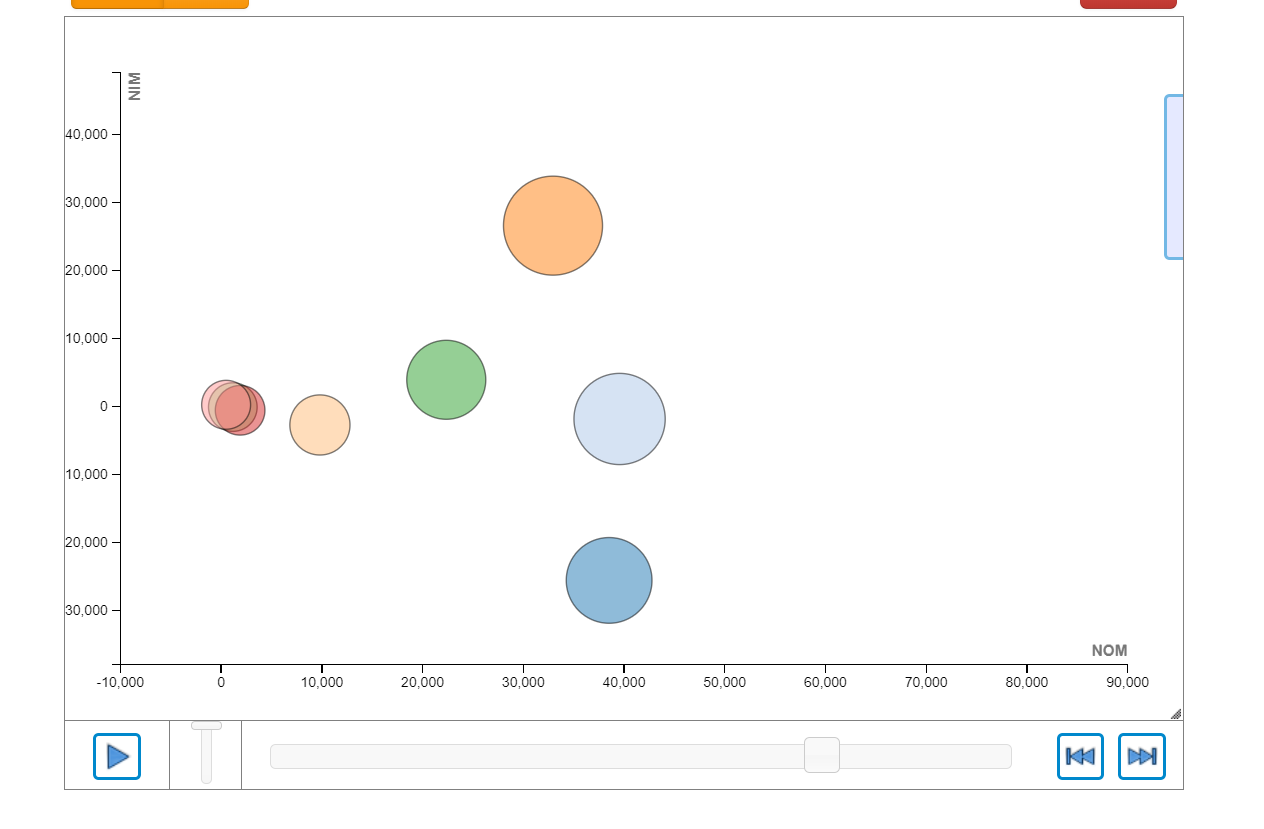

In [28]:
#NOM_df.set_index('Year', inplace = True)
VIC_NOM = NOM_df['VIC']
NSW_NOM = NOM_df['NSW']
VIC_NSW = pd.concat([VIC_NOM, NSW_NOM], axis = 1)
result = VIC_NSW[VIC_NSW["VIC"] > VIC_NSW["NSW"]]
result

,VIC,NSW
29,39561,38523


## c

<div class="alert alert-block alert-info">
Which state has the highest Net Interstate Migration most of the years (for the period 1977 to 2016)?

QLD has the highest Net Interstate Migration

# task B

# B1

## 1

<div class="alert alert-block alert-info">
For each suburb, calculate the number of days that at least 15 crimes have occurred per day. 

In [29]:
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')

In [30]:
#count the number of offence count
date_crime = crime.groupby(['Suburb - Incident', 'Reported Date']).sum()
date_crime_filter = date_crime[date_crime['Offence Count']>15]
date_crime_filter.groupby('Suburb - Incident').count()

,Offence Count
Suburb - Incident,
ADELAIDE,752
ASCOT PARK,1
GLENELG,1
LOXTON,1
MARLESTON,1
MORPHETT VALE,2
MOUNT GAMBIER,3
MURRAY BRIDGE,1
NOT DISCLOSED,4


## 2

<div class="alert alert-block alert-info">
Now which suburbs do have at least one day where the daily number of crimes are more than 15. Plot the number of days that at least 15 crimes have occurred for the suburbs you found in this step (step 2) using a bar graph. 

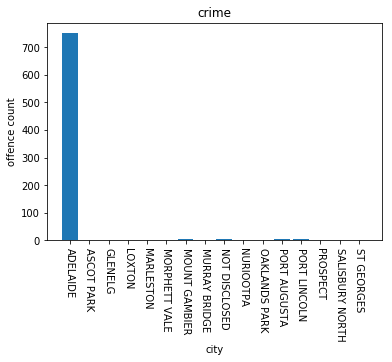

In [31]:
#group by Suburb - Incident and count the number
date_crime_sub = date_crime_filter.groupby('Suburb - Incident').count()
plt.bar(date_crime_sub.index.values, date_crime_sub['Offence Count'])
plt.xticks(rotation=270)
plt.ylabel('offence count')
plt.xlabel('city')
plt.title('crime')
plt.show()

## 3

<div class="alert alert-block alert-info">
Use an appropriate graph to visualize and detect outliers (extreme values) on the data from step 2 and remove them. Then, plot the data again using a bar graph.

{'whiskers': [<matplotlib.lines.Line2D at 0x243c7e225f8>,
 'caps': [<matplotlib.lines.Line2D at 0x243c7e22c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x243c7e22240>],
 'medians': [<matplotlib.lines.Line2D at 0x243c7e22f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x243c7e2d6a0>],
 'means': []}

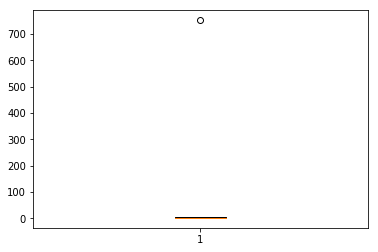

In [32]:
plt.boxplot(date_crime_sub['Offence Count'])

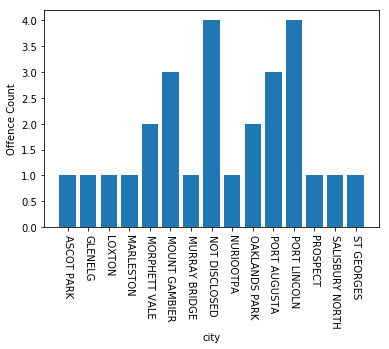

In [33]:
plt.bar(date_crime_sub.index[1:], date_crime_sub.iloc[1:, 0])
plt.xticks(rotation=270)
plt.ylabel('Offence Count')
plt.xlabel('city')
plt.show()

## 4

<div class="alert alert-block alert-info">
Compare the bar graphs in step 2 and 3. Which bar graph is easier to interpret? Why?

answer: The secand one. Adeladie has large number of offence, we can not see other city's offence count clearly. 

## B2:challenge: identify mistakes in data entry

The mistake data is the Reported Date. Date and month are reversed for each month from the first day to the twelfth day of each month

In [34]:
#transfer the format of Reported Date to date format and extract the year, month and day
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')
crime.loc[:, 'Reported Date'] = pd.to_datetime(crime.loc[:,'Reported Date'])
crime['month'] = crime.loc[:,'Reported Date'].dt.month
crime['day'] = crime.loc[:,'Reported Date'].dt.day
crime['year'] = crime.loc[:,'Reported Date'].dt.year
#select the wrong date
crime_wrong_date = crime[crime.loc[:,'day']<13]
#change the date
crime_wrong_date['Date'] = crime_wrong_date.loc[:,'year'].map(str)+'-'+crime_wrong_date.loc[:,'day'].map(str)+'-'+crime_wrong_date.loc[:, 'month'].map(str)
correct_list = crime_wrong_date.loc[:,'Date'].tolist()
crime_wrong_date.loc[:,'Reported Date'] = correct_list
#select the correct date
crime_correct_date = crime[crime.loc[:,'day']>12]
#chang Report date
crime_correct_date['Date'] = crime_correct_date.loc[:, 'year'].map(str)+'-'+crime_correct_date.loc[:,'month'].map(str)+'-'+crime_correct_date.loc[:, 'day'].map(str)
correct_list_1 = crime_correct_date.loc[:,'Date'].tolist()
crime_correct_date.loc[:,'Reported Date'] = correct_list_1
#link the two dataframe.
correct_date = pd.concat([crime_wrong_date, crime_correct_date], axis=0)
correct_date

C:\Users\Cyrus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Cyrus\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Cyrus\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count,month,day,year,Date
0,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0,1,1,2014,2014-1-1
1,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0,1,1,2014,2014-1-1
2,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0,1,1,2014,2014-1-1
3,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0,1,1,2014,2014-1-1
4,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0,1,1,2014,2014-1-1
5,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0,1,1,2014,2014-1-1
6,2014-1-1,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ROBBERY AND RELATED OFFENCES,Non-aggravated robbery,1.0,1,1,2014,2014-1-1
7,2014-1-1,NOT DISCLOSED,NOT DISCLOSED,OFFENCES AGAINST THE PERSON,SEXUAL ASSAULT AND RELATED OFFENCES,Non-aggravated sexual assault,2.0,1,1,2014,2014-1-1
8,2014-1-1,ALBERTON,5014,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1.0,1,1,2014,2014-1-1
9,2014-1-1,ALBERT PARK,5014,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,1,1,2014,2014-1-1


## part c (Challenge)

Download the data at: https://www.kaggle.com/jolasa/waves-measuring-buoys-data-mooloolaba

In [35]:
waves_df = pd.read_csv('waves.csv')


what is the max of Hs, Hmax, Tz, Tp, sst
- hs: Significant wave height, an average of the highest third of the waves in a record
- hmax: The maximum wave height in the record
- tz: The zero upcrossing wave period
- tp: The peak energy wave period
- peak direction: Direction (related to true north) from which the peak period waves are coming from
- sst: Approximation of sea surface temperature

In [36]:
waves_df['Date/Time'] = pd.to_datetime(waves_df['Date/Time'])
waves_df['year'] = waves_df['Date/Time'].dt.year.map(int)
waves_df['month'] = waves_df['Date/Time'].dt.month.map(int)

In [37]:
waves_mean = waves_df.groupby(['year', 'month']).mean()
waves_mean.reset_index(inplace = True)

In [38]:
waves_mean['year'] = waves_mean['year'].astype(str)
waves_mean['month'] = waves_mean['month'].astype(str)
waves_mean['year_month'] = waves_mean['year'] + '-' + waves_mean['month']
waves_mean.drop('year', axis = 1, inplace = True)
waves_mean.drop('month', axis = 1, inplace = True)

In [39]:
waves_mean.set_index('year_month', drop = True, inplace = True)

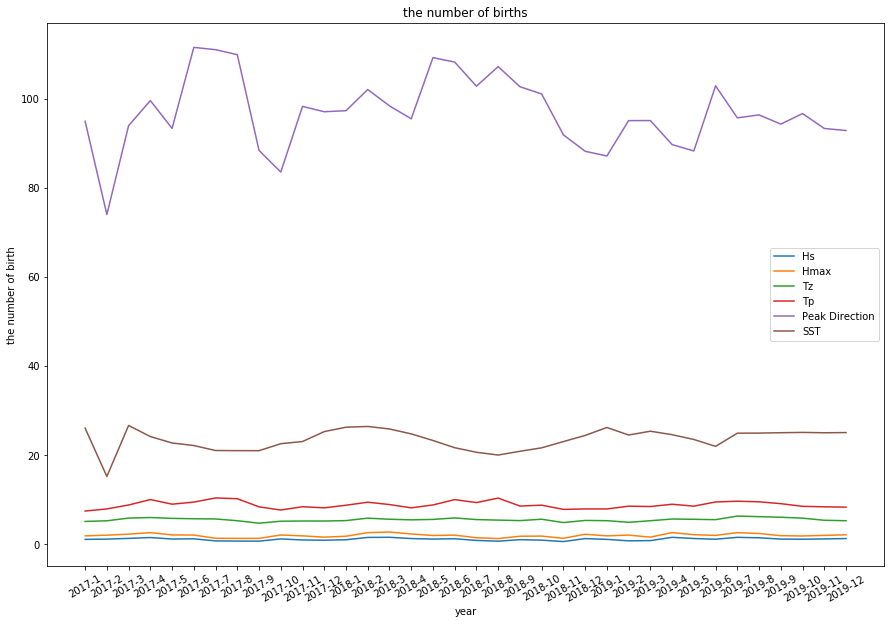

In [40]:
plt.figure(figsize = (15, 10))
plt.plot(waves_mean)
plt.legend(waves_mean.columns.values)
plt.title('the number of births')
plt.xlabel('year')
plt.ylabel('the number of birth')
plt.xticks(rotation = 30)
plt.show()


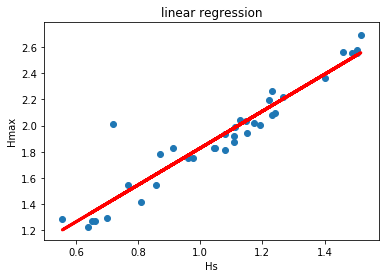

In [41]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(waves_mean['Hs'], waves_mean.loc[:, 'Hmax'])
line = [slope*xi + intercept for xi in waves_mean['Hs']]
plt.plot(waves_mean['Hs'], line, 'r-', linewidth = 3)
plt.scatter(waves_mean['Hs'], waves_mean['Hmax'])
plt.xlabel('Hs')
plt.ylabel('Hmax')
plt.title('linear regression')
plt.show()

this linear regression is indicate Hmax and Hs is liner relationship, so we can predict the Hmax by Hs or predicct the Hs by Hmax

In [42]:
predict_1 = slope * 3.0 + intercept
print('when Hs is 3, the Hmax is:' + str(predict_1))

when Hs is 3, the Hmax is:4.649155579792573
